In [64]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)


# read data
df = pd.read_csv(r'C:\Users\Admin\Downloads\heart_2020_cleaned.csv')

In [66]:
# Check Data
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [67]:
# Check if there's missing data

for col in df.columns:
    dataMissing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, dataMissing))

HeartDisease - 0.0%
BMI - 0.0%
Smoking - 0.0%
AlcoholDrinking - 0.0%
Stroke - 0.0%
PhysicalHealth - 0.0%
MentalHealth - 0.0%
DiffWalking - 0.0%
Sex - 0.0%
AgeCategory - 0.0%
Race - 0.0%
Diabetic - 0.0%
PhysicalActivity - 0.0%
GenHealth - 0.0%
SleepTime - 0.0%
Asthma - 0.0%
KidneyDisease - 0.0%
SkinCancer - 0.0%


In [68]:
# Look at data types

df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [69]:
# Make NewAge column - fix age range

df['NewAge'] = df['AgeCategory'].astype(str).str[:2]

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,55
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,80
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,65
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,75
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,40


In [70]:
# Sort By NewAge
df = df.sort_values(by=['NewAge'], inplace=False, ascending=False)

In [71]:
# ASSUMPTIONS: BMI has high correlation, 18.6 - 24.9 = considered healthy
# ASSUMPTIONS: Listed below are more at risk:
# Smoker, Heavy Drinker, History of Stroke, High Rate at Physical & Mental Health, Difficulty walking,
# Diabetic, No physical activity, Low SleepTime, with Asthma, with kidney disease, higher NewAge

In [72]:
# Make HaveDisease column: Convert Yes / No into 1 / 0

df['HaveDisease'] = df['HeartDisease'].map(dict(Yes=1, No=0))

In [73]:
# Check for added columns
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge,HaveDisease
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No,80,0
245603,Yes,26.04,Yes,Yes,No,0.0,0.0,Yes,Female,80 or older,White,No,No,Very good,7.0,No,No,No,80,1
72923,No,29.15,No,No,No,1.0,0.0,Yes,Male,80 or older,Black,Yes,Yes,Fair,8.0,No,No,No,80,0
72926,No,29.76,No,No,No,0.0,0.0,No,Female,80 or older,Black,No,Yes,Good,6.0,No,No,No,80,0
182773,No,23.92,No,No,No,0.0,0.0,No,Male,80 or older,White,No,Yes,Excellent,7.0,No,No,No,80,0


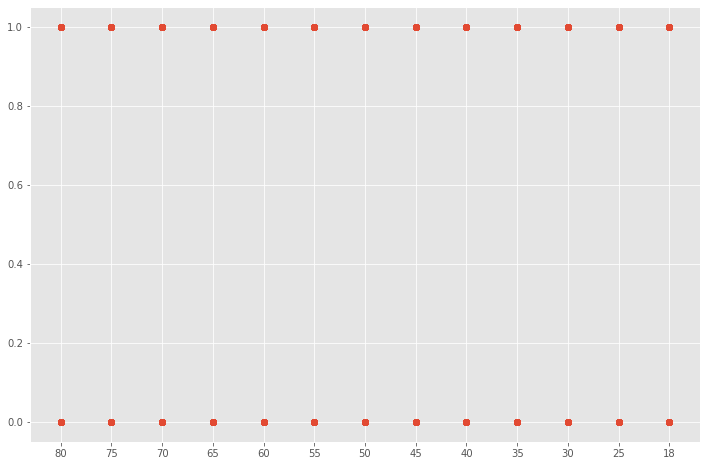

In [74]:
# Scatter Plot with NewAge vs HaveDisease

plt.scatter(x=df['NewAge'], y=df['HaveDisease'])
plt.show()

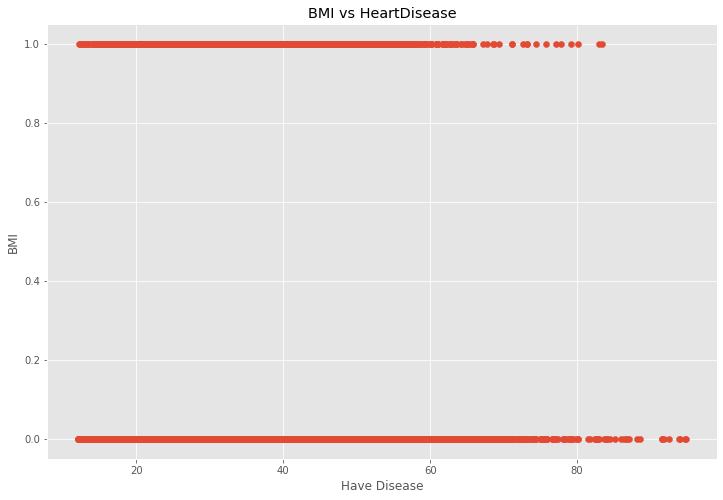

In [75]:
# BMI vs Disease

plt.scatter(x=df['BMI'], y=df['HaveDisease'])
plt.title('BMI vs HeartDisease')
plt.xlabel('Have Disease')
plt.ylabel('BMI')
plt.show()

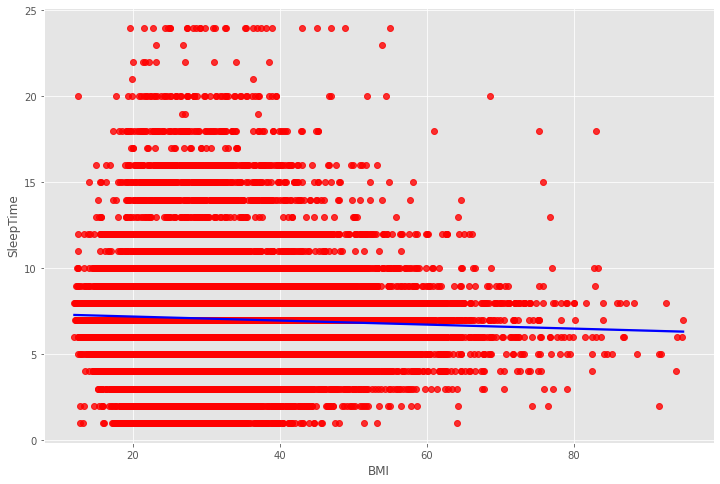

In [76]:
sns.regplot(x='BMI', y='SleepTime', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.show()

In [77]:
# Check correlation
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HaveDisease
BMI,1.000000,0.109788,0.064131,-0.051822,0.051803
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387,0.170721
MentalHealth,0.064131,0.287987,1.000000,-0.119717,0.028591
SleepTime,-0.051822,-0.061387,-0.119717,1.000000,0.008327
HaveDisease,0.051803,0.170721,0.028591,0.008327,1.000000


In [78]:
# Convert NewAge to float (from object)
df['NewAge'] = df['NewAge'].astype(float, errors = 'raise')

In [79]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
NewAge              float64
HaveDisease           int64
dtype: object

In [80]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge,HaveDisease
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No,80.0,0
245603,Yes,26.04,Yes,Yes,No,0.0,0.0,Yes,Female,80 or older,White,No,No,Very good,7.0,No,No,No,80.0,1
72923,No,29.15,No,No,No,1.0,0.0,Yes,Male,80 or older,Black,Yes,Yes,Fair,8.0,No,No,No,80.0,0
72926,No,29.76,No,No,No,0.0,0.0,No,Female,80 or older,Black,No,Yes,Good,6.0,No,No,No,80.0,0
182773,No,23.92,No,No,No,0.0,0.0,No,Male,80 or older,White,No,Yes,Excellent,7.0,No,No,No,80.0,0


In [81]:
# Check correlation now (included NewAge)
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime,NewAge,HaveDisease
BMI,1.000000,0.109788,0.064131,-0.051822,-0.001740,0.051803
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387,0.110789,0.170721
MentalHealth,0.064131,0.287987,1.000000,-0.119717,-0.155455,0.028591
SleepTime,-0.051822,-0.061387,-0.119717,1.000000,0.103071,0.008327
NewAge,-0.001740,0.110789,-0.155455,0.103071,1.000000,0.232325
HaveDisease,0.051803,0.170721,0.028591,0.008327,0.232325,1.000000


In [83]:
# Visualize correlation

correlation = df.corr()

sns.heatmap(correlation, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Disease Factors')
plt.ylabel('Disease Factors')

%matplotlib inline
plt.show()

In [84]:
# give number values to strings in category
df_toNumeric = df

# to convert: (for only Yes / No)
# ASSUMING Yes is bad (except for Physical Activity (not included) )
# Smoking, Alcohol Drinking, Stroke, DiffWalking, Diabetic, Asthma
# Kidney Disease, Skin Cancer

for col_name in df_toNumeric.columns:
    if(df_toNumeric[col_name].dtype == 'object'):
        df_toNumeric[col_name] = df_toNumeric[col_name].astype('category')
        df_toNumeric[col_name] = df_toNumeric[col_name].cat.codes
        
df_toNumeric

# no need to use HaveDisease column, also try to use AgeCategory instead of NewAge,
# but don't modify NewAge, field is sorted through NewAge

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge,HaveDisease
319794,0,46.56,0,0,0,0.0,0.0,0,0,12,3,0,1,2,8.0,0,0,0,80.0,0
245603,1,26.04,1,1,0,0.0,0.0,1,0,12,5,0,0,4,7.0,0,0,0,80.0,1
72923,0,29.15,0,0,0,1.0,0.0,1,1,12,2,2,1,1,8.0,0,0,0,80.0,0
72926,0,29.76,0,0,0,0.0,0.0,0,0,12,2,0,1,2,6.0,0,0,0,80.0,0
182773,0,23.92,0,0,0,0.0,0.0,0,1,12,5,0,1,0,7.0,0,0,0,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218789,0,31.38,0,0,0,0.0,2.0,0,1,0,5,0,1,4,8.0,0,0,0,18.0,0
98426,0,28.89,0,0,0,0.0,0.0,0,0,0,5,0,1,4,7.0,1,0,0,18.0,0
98421,0,23.06,0,0,0,0.0,0.0,0,1,0,4,0,1,2,5.0,1,0,0,18.0,0
98415,0,19.71,1,0,0,3.0,30.0,0,1,0,5,0,1,4,6.0,0,0,0,18.0,0


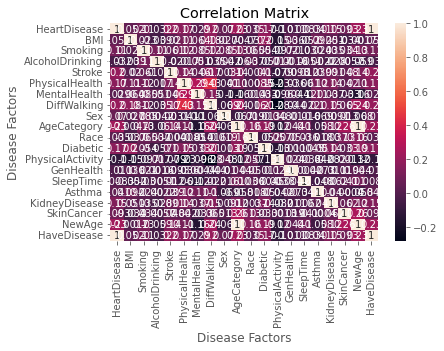

In [85]:
# Visual
correlation = df_toNumeric.corr()

sns.heatmap(correlation, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Disease Factors')
plt.ylabel('Disease Factors')

plt.show()

# 1 is male
# PROBLEM with GenHealth, Excellent=0, but fair=1, good is 2
# results in AgeCategory & NewAge might be similar,
# also in HeartDisease & HaveDisease

In [86]:
# Filter Correlation Matrix

df_toNumeric.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge,HaveDisease
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317,0.232325,1.000000
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644,-0.001740,0.051803
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977,0.130384,0.107764
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702,-0.058837,-0.032080
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116,0.137280,0.196835
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700,0.110789,0.170721
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412,-0.155455,0.028591
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840,0.242552,0.201258
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434,-0.067682,0.070040
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537,0.999712,0.233432


In [87]:
new_matrix = df_toNumeric.corr()

correlation_pairs = new_matrix.unstack()

correlation_pairs

HeartDisease  HeartDisease       1.000000
              BMI                0.051803
              Smoking            0.107764
              AlcoholDrinking   -0.032080
              Stroke             0.196835
                                   ...   
HaveDisease   Asthma             0.041444
              KidneyDisease      0.145197
              SkinCancer         0.093317
              NewAge             0.232325
              HaveDisease        1.000000
Length: 400, dtype: float64

In [88]:
# Top 3 Highest Correlations: Age, Difficulty Walking, History of Stroke

pd.set_option('display.max_rows', None)

In [89]:
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs.head()

DiffWalking       PhysicalActivity   -0.278524
PhysicalActivity  DiffWalking        -0.278524
PhysicalHealth    PhysicalActivity   -0.232283
PhysicalActivity  PhysicalHealth     -0.232283
MentalHealth      AgeCategory        -0.155506
dtype: float64

In [90]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.05]
high_correlation.head()

# Check highest correlations to HeartDisease/HaveDisease

Race             GenHealth        0.050344
GenHealth        Race             0.050344
KidneyDisease    BMI              0.050768
BMI              KidneyDisease    0.050768
AlcoholDrinking  MentalHealth     0.051282
dtype: float64

In [91]:
# FINAL CONCLUSION
# Deciding Factors of Heart Disease:
# Age, DiffWalking, Stroke, Physical Health, Diabetic, Kidney Disease, and so on
# General Health conversion was not on point, but other factors could account for it
# My assumption was wrong: BMI is not highly correlated with Heart Disease